# Lesson

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import Data
ords_prods_merge = pd.read_pickle(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Prepared Data/orders_products_merged_derived_aggregated.pkl')

# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

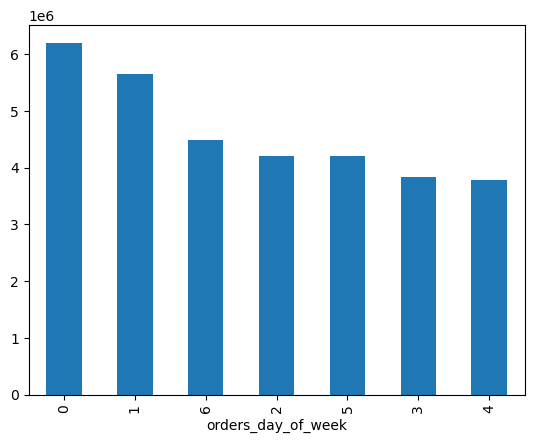

In [3]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

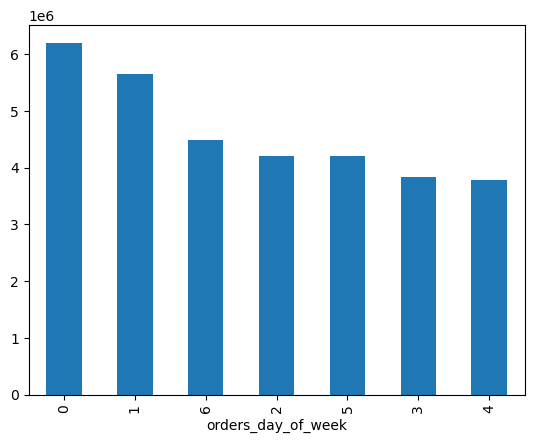

In [4]:
#Saving the chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [5]:
#Exporting the chart 
bar.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/bar_orders_dow.png')

# Histograms and Scatterplots

<Axes: ylabel='Frequency'>

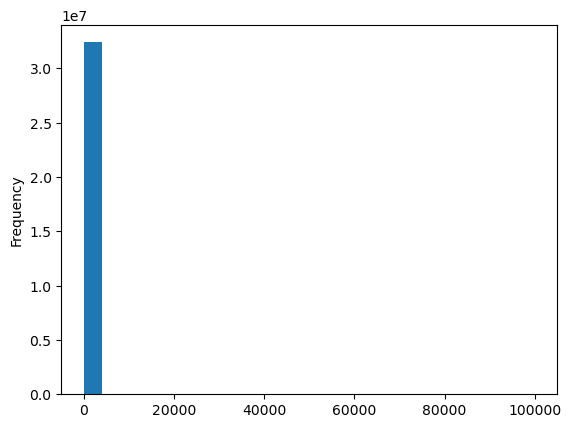

In [6]:
#Creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

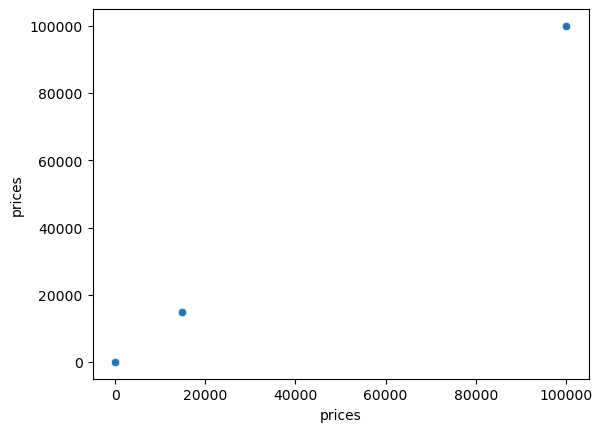

In [7]:
#Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

 There is something wrong with the prices, so we'll need to do a checkup

In [8]:
#Checking prices
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,8.268041,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,8.268041,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.916667,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.916667,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.106061,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,8.118644,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,8.118644,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,4.971292,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,11.840491,Regular customer


In [9]:
#For now we need to turn them into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [10]:
#Check if it worked
ords_prods_merge['prices'].max()

25.0

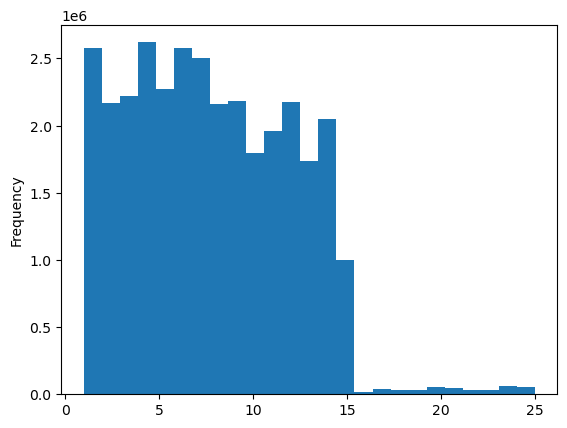

In [11]:
#Now we can create a histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

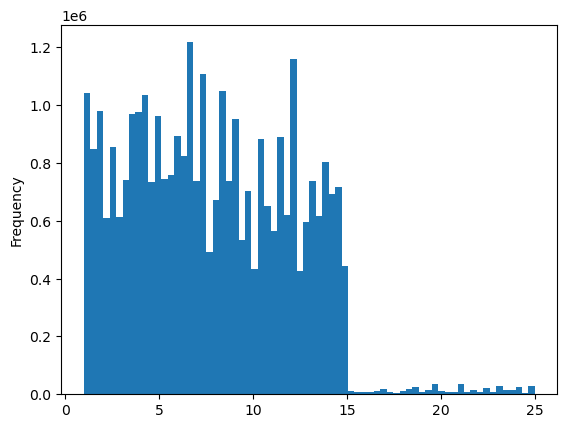

In [12]:
#If you want more detail increase the number of bins 
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
#Export the histograms 
hist.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/histogram_prices_25.png')

In [14]:
hist_2.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/histogram_prices_70.png')

# Creating Line Charts

Line charts are traditionally used to visualize the development of a characteristic over time.

In [15]:
#In order to create this we'll need to use sample data

In [16]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [18]:
#Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [19]:
#Check your data
len(ords_prods_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
#Reducing your samples to only the columns you need
df_2 = small[['orders_day_of_week','prices']]

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

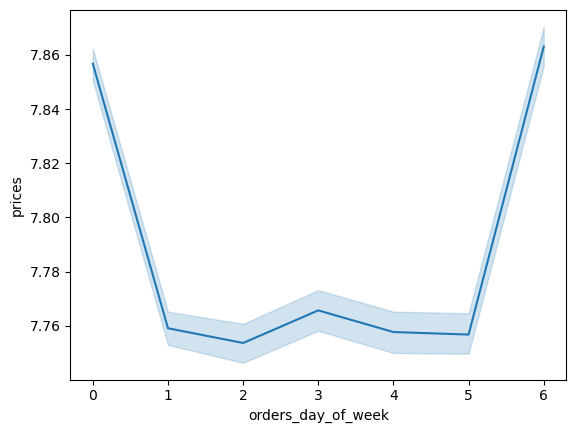

In [22]:
#Line Chart for small 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
#Export the chart
line.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/line_chart_small.png')